# IMDB Datasets

## MLP

In [1]:
import numpy as np
from tensorflow import keras
from keras import models , layers
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000) # 등장 빈도 상위 10000번째 까지의 단어 불러오기

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/hyeonhochoi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/hyeonhochoi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [3]:
X_train.shape, y_train.shape

((25000,), (25000,))

In [4]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

##### Data Processing

빈도 상위 10000번째까지의 데이터를 불러왔으므로, 데이터는 1~10000의 숫자로 표현될 것이다.  

따라서, 데이터 분석을 위해 (25000,)의 데이터를 (25000,10000) 데이터의 형태로 바꿔서 각 리뷰에 단어의 포함 유무를 나타낸다.

In [5]:
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X_train)
X_test=vect(X_test)

상위 i번째 빈도의 단어를 포함하고 있으면 데이터의 i행은 1, 없으면 0으로 변환되었다.

In [6]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

검증 데이터와 트레이닝 데이터 분리(20%)

In [7]:
X_val = X_train[:5000]
partial_X_train = X_train[5000:]

y_val = y_train[:5000]
partial_y_train = y_train[5000:]

##### Modeling

In [8]:
net = models.Sequential()
net.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.7))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.7))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

In [9]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 320,577
Trainable params: 320,577
Non-trainable params: 0
_________________________________________________________________


In [10]:
net_val = net.fit(partial_X_train, partial_y_train, epochs=10, batch_size=128, validation_data= (X_val,y_val))

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 0.6751 - acc: 0.5536 - val_loss: 0.4495 - val_acc: 0.8620
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.4953 - acc: 0.7514 - val_loss: 0.3120 - val_acc: 0.8868
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3960 - acc: 0.8225 - val_loss: 0.2900 - val_acc: 0.8872
Epoch 4/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3472 - acc: 0.8514 - val_loss: 0.2768 - val_acc: 0.8886
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3144 - acc: 0.8670 - val_loss: 0.2779 - val_acc: 0.8886
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 0.2839 - acc: 0.8745 - val_loss: 0.2810 - val_acc: 0.8940
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 0.2734 - acc: 0.8815 - val_loss: 0.2898 - val_acc: 0.8930
Epoch 8/10
157/157 [==============================] - 1s 4ms/step - loss: 0.

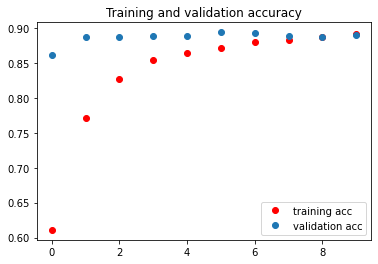

In [11]:
net_dict = net_val.history
net_accuracy = net_dict['acc']
net_val_accuracy = net_dict['val_acc']
x = np.arange(0,len(net_accuracy))

plt.plot(x,net_accuracy,'ro', label = 'training acc')
plt.plot(x,net_val_accuracy,'o', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

##### 그래프 1. MLP에서 Training과 Validation 데이터의 Iteration(x축)에 따른 정확도 변화

## RNN 

In [12]:
(X1_train, y1_train), (X1_test, y1_test) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/hyeonhochoi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/hyeonhochoi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [13]:
X1_train.shape, y1_train.shape

((25000,), (25000,))

##### Data Processing

RNN 분석을 위해 각 리뷰의 단어 수를 일정하게 조절한다. 단어 수가 300개를 넘으면 자르고, 300개 이하면 남는 부분을 0으로 채워 (25000,)의 형태를 (25000,300)으로 변환

In [14]:
maxlen = 300 # sequence length
X1_train = sequence.pad_sequences(X1_train, maxlen=maxlen)
X1_test = sequence.pad_sequences(X1_test, maxlen=maxlen)

In [15]:
X1_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   

In [16]:
X1_train.shape

(25000, 300)

##### Modeling

In [17]:
rnn = models.Sequential()
rnn.add(layers.Embedding(10000,16)) 
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
rnn.add(layers.SimpleRNN(32)) # 마지막 RNN을 제외한 나머지 RNN에는 return_sequences = 'True'
rnn.add(layers.Dense(1, activation = 'sigmoid'))
rnn.compile(optimizer = 'nadam', loss = 'binary_crossentropy',metrics = ['acc'])

In [18]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          1568      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 163,681
Trainable params: 163,681
Non-trainable params: 0
_________________________________________________________________


In [19]:
rnn_val=rnn.fit(X1_train,y1_train,epochs=10,verbose=1,batch_size =128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 89ms/step - loss: 0.6851 - acc: 0.5452 - val_loss: 0.5744 - val_acc: 0.7186
Epoch 2/10
157/157 [==============================] - 13s 84ms/step - loss: 0.4642 - acc: 0.7856 - val_loss: 0.4595 - val_acc: 0.7878
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 0.3305 - acc: 0.8606 - val_loss: 0.3832 - val_acc: 0.8388
Epoch 4/10
157/157 [==============================] - 13s 83ms/step - loss: 0.2398 - acc: 0.9132 - val_loss: 0.4235 - val_acc: 0.8168
Epoch 5/10
157/157 [==============================] - 13s 83ms/step - loss: 0.1779 - acc: 0.9374 - val_loss: 0.4262 - val_acc: 0.8196
Epoch 6/10
157/157 [==============================] - 13s 84ms/step - loss: 0.1323 - acc: 0.9556 - val_loss: 0.4676 - val_acc: 0.8470
Epoch 7/10
157/157 [==============================] - 13s 84ms/step - loss: 0.0694 - acc: 0.9811 - val_loss: 0.5067 - val_acc: 0.8334
Epoch 8/10
157/157 [==============================] - 13s 86ms

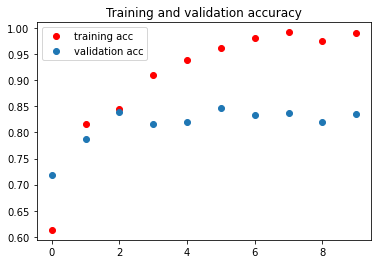

In [21]:
rnn_dict = rnn_val.history
rnn_accuracy = rnn_dict['acc']
rnn_val_accuracy = rnn_dict['val_acc']
x = np.arange(0,len(rnn_accuracy))

plt.plot(x,rnn_accuracy,'ro', label = 'training acc')
plt.plot(x,rnn_val_accuracy,'o', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

##### 그래프 2. RNN에서 Training과 Validation 데이터의 Iteration(x축)에 따른 정확도 변화

##### Overfitting을 확인할 수 있음. 이를 해결하기 위해서 Dropout을 적용한다.

In [22]:
rnnD = models.Sequential() # Dropout을 적용한 모델
rnnD.add(layers.Embedding(10000,16)) 
rnnD.add(layers.SimpleRNN(32,return_sequences='True')) 
rnnD.add(layers.Dropout(0.5)) 
rnnD.add(layers.SimpleRNN(32)) # 마지막 RNN을 제외한 나머지 RNN에는 return_sequences = 'True'
rnnD.add(layers.Dropout(0.5))
rnnD.add(layers.Dense(1, activation = 'sigmoid'))
rnnD.compile(optimizer = 'nadam', loss = 'binary_crossentropy',metrics = ['acc'])

In [23]:
rnnD.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          1568      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 163,681
Trainable params: 163,681
Non-trainable params: 0
________________________________________________

In [24]:
rnnD_val=rnnD.fit(X1_train,y1_train,epochs=10,verbose=1,batch_size =128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 94ms/step - loss: 0.7303 - acc: 0.5030 - val_loss: 0.8457 - val_acc: 0.4940
Epoch 2/10
157/157 [==============================] - 14s 91ms/step - loss: 0.5908 - acc: 0.6948 - val_loss: 0.4673 - val_acc: 0.7852
Epoch 3/10
157/157 [==============================] - 14s 90ms/step - loss: 0.3869 - acc: 0.8427 - val_loss: 0.3748 - val_acc: 0.8404
Epoch 4/10
157/157 [==============================] - 14s 89ms/step - loss: 0.2799 - acc: 0.8977 - val_loss: 0.9539 - val_acc: 0.6692
Epoch 5/10
157/157 [==============================] - 14s 88ms/step - loss: 0.3045 - acc: 0.8844 - val_loss: 0.3875 - val_acc: 0.8532
Epoch 6/10
157/157 [==============================] - 14s 89ms/step - loss: 0.2036 - acc: 0.9317 - val_loss: 0.4192 - val_acc: 0.8506
Epoch 7/10
157/157 [==============================] - 14s 89ms/step - loss: 0.1656 - acc: 0.9453 - val_loss: 0.4653 - val_acc: 0.8036
Epoch 8/10
157/157 [==============================] - 14s 89ms

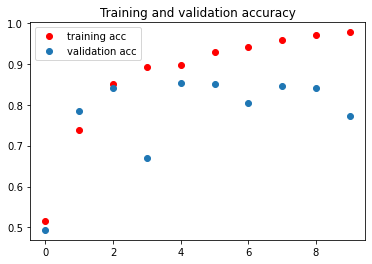

In [25]:
rnnD_dict = rnnD_val.history
rnnD_accuracy = rnnD_dict['acc']
rnnD_val_accuracy = rnnD_dict['val_acc']
x = np.arange(0,len(rnnD_accuracy))

plt.plot(x,rnnD_accuracy,'ro', label = 'training acc')
plt.plot(x,rnnD_val_accuracy,'o', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

##### 그래프 3. Dropout을 적용한 RNN에서 Training과 Validation 데이터의 Iteration(x축)에 따른 정확도 변화

##### Dropout을 적용하였지만 유의미하게  Overfitting이 해결되지 않았으며, Validation의 accuracy의 변화 폭이 매우 커져 모델의 정확성에 문제가 생긴 것으로 보인다.

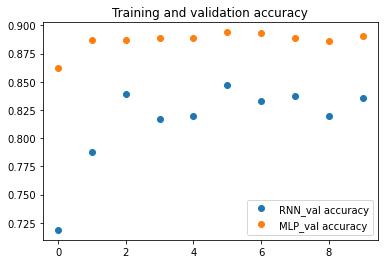

In [29]:
plt.plot(x,rnn_val_accuracy,'o', label = 'RNN_val accuracy')
plt.legend()
plt.plot(x,net_val_accuracy,'o', label = 'MLP_val accuracy')
plt.title('Training and validation accuracy')
plt.legend()

##### 그래프 4. MLP와  RNN에서 Validation 데이터의 Iteration(x축)에 따른 정확도 변화

In [30]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 771us/step - loss: 0.3375 - acc: 0.8794


In [31]:
test1_loss, test1_acc = rnn.evaluate(X1_test,y1_test)

782/782 [==============================] - 11s 14ms/step - loss: 0.6441 - acc: 0.8292


||MLP|RNN|
|::|::|::|
|accuracy|0.8794|0.8292|

##### 그래프 2. RNN에서 Training과 Validation 데이터의 Iteration(x축)에 따른 정확도 변화

## 결론 및 주의점

##### 결론 
- Sequence에 따른 분석(RNN)보다 feature를 서로 무관하게 하여 모델링(MLP)한 모델이 IMDB 데이터에서 더 높은 정확도를 가진다.
- RNN에서 각 SimpleRNN 레이어에 Dropout을 하여도 Dense 레이어에서만큼의 overfitting문제를 해결하지 못하여 정규화된 모델 구성에 제약이 존재한다.


##### 주의점
- Multi-layer RNN에서 Dropout을 하는 것은 모델을 효과적으로 정규화할 수 없다. 이는 RNN 구조상 무작위로 요소들을 생략하였을 때, 과거의 정보가 통째로 지워질 수 있기 때문이다. Dropout을 적용하는 것은 학습 데이터에 노이즈를 증가시킬 수 있다.
- 입력되는 학습 데이터의 길이가 길어질수록 가중치와 bias가 유의미하게 변하지 못하는 gradient vanishing problem을 가지고 있다. 이를 해결하기 위해서 LSTM(Long-Short Term Memory)모델을 사용할 수 있다. 
- IDEA를 통해서 RNN 분석에서 모든 RNN 레이어에서 Dropout을 적용하는 것이 아닌 batch 사이즈만큼 지난 후 다음 층으로 넘어가는 연결 부분에만 Dropout을 적용하여 Overfitting을 피할 수 있다.

#해당 웹페이지를 참고하였습니다 
1. https://medium.com/curg/deep-rnn-%EC%A0%95%EA%B7%9C%ED%99%94%EA%B0%80-%EA%B6%81%EA%B8%88%ED%95%B4-7d69f3bbc171
2. https://nmhkahn.github.io/RNN-Regularizations